### Problem: Maximie f(x) = x^2-11x+100 when x = 0 to 127

Representation or ecoding solution:
x can be represented using 7 bits binary number.

# Step 1: Initialize Population

In [1]:
import random
def initPopulation(b, n = 10): # n is the number of solutions, b is the length
    p = [] # to store solution set/ initial population
    for i in range(n):
        s = [] # to store a solution as a list
        for j in range(b):
            s.append(random.choice([0,1]))    
        # avoid zero
        p.append(s)
    return p

In [2]:
population = initPopulation(7,20)
population

[[1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 0]]

# Step 2: Reproduction or Parent Selection

Fitness Calculation

In [3]:
[i for i in range(4,-1,-1)]

[4, 3, 2, 1, 0]

In [4]:
def getFitness(p): # p is the whole population
    f = [] # to store fitness values
    for sol in p:
        d = 0 # decimel value
        b = len(sol)
        for i in range(b-1,-1,-1): # binary to decimel
            d = d + sol[i]*2**(b-1-i)
        f.append(d**2 - 11*d + 100) # fitness function
    return f

In [5]:
fitness = getFitness(population)
fitness

[13410,
 13410,
 13410,
 72,
 2050,
 13180,
 3040,
 76,
 1126,
 4360,
 6712,
 8812,
 126,
 10782,
 14112,
 2520,
 1126,
 1552,
 8626,
 7552]

calculate probability and select parents

In [6]:
def select_parent(n, pop): # probability, parent selection
    # probability
    fitness = getFitness(pop)
    total_fitness = sum(fitness)
    prob = [round(f/total_fitness,3) for f in fitness]
    # parent selection
    parents = []
    for i in range(n):
        # roullete wheel, generate a random number
        r = random.choice(range(1,1001,1))/1000
        lim = 0
        # check bin number of r
        for j in range(len(prob)):
            lim = lim + prob[j]
            if r <= lim :#checking the bin
                print(j)
                parents.append(pop[j])
                break
    return parents

In [7]:
parents = select_parent(8, population)
parents

6
5
19
1
1
15
1
19


[[0, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 1],
 [1, 0, 1, 1, 1, 0, 0]]

# Step 3: Crossover

In [8]:
# define a method crossover (input is parents set)
import random

def crossover(parents):
    list1 =[]
    list2 = []

    offspring = []
    counter=1
    cp = random.choice(range(1,7)) #crossoverPoint
    print("crossover Point: ",cp)


    
# for loop to perform crossovers
    for i in range (len(parents)):
        sublist= parents.pop()
        
        if counter%2==0:

            #split the 2nd string of the parents and add it with the 1st string split parts
            #performing crossover
            list1 = list1 + sublist[cp:]
            list2 = list2 + sublist[:cp]
            
            #storing the crossover in a list
            offspring.append(list1)
            offspring.append(list2)
            counter+=1
        
        else:
            #split the 1st string of the parents stored in sublist
            list1 = sublist[:cp]
            list2 = sublist[cp:]
            
            print
            counter+=1

            
    return offspring

In [9]:
offspring = crossover(parents)
offspring

crossover Point:  6


[[1, 0, 1, 1, 1, 0, 1],
 [0, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 0],
 [1, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 0]]

# Example
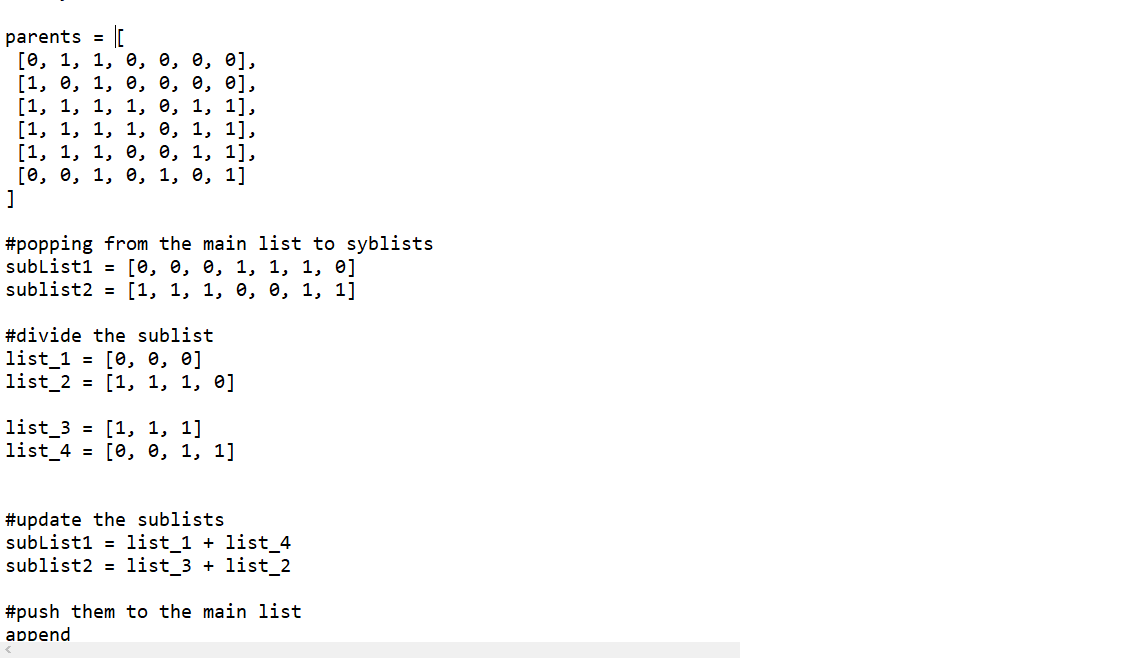

# Step 4: Select Survivor
The selected survivors (solutions) will be added to population

Select top 2 offspring based on fitness value and add them to population.

Repeat Step 2 to 4 for further iterations

In [10]:
# define a method to select top offsprings (input offsprings, top)

def getTOPoffspring(offspring):
    initial = []
    initial.append(offspring)
    fitness = []
    survivor = []
    value = 0 ##total decimal value of a single string of sublist
    
    for i in range(len(offspring)):
        sublist = offspring.pop()
        
        for j in range(len(sublist)):
            digit = sublist.pop()
            
            if digit == 1:
                value = value + pow(2, j)
                
        fitness.append((pow(value, 2) - 11*value + 100))
        value = 0
    
    
    return fitness


In [11]:

number_list = getTOPoffspring(offspring)
number_list

[670, 13180, 10990, 13180, 14112, 2520, 3040, 7726]

# we have found the fitness value(number_list) for the offspring, among them we're gonna find two offsrping with highest fitness value

In [12]:
offspring=[[1, 1, 1, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 1],
 [1, 1, 1, 0, 1, 0, 1],
 [1, 1, 1, 0, 0, 0, 1],
 [1, 1, 1, 0, 1, 0, 1],
 [1, 1, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 1, 1, 1]]

new = []


for i in range(len(number_list)):
    max_value = max(number_list)
    max_index = number_list.index(max_value)
    
    if(len(new)<=1): #max survivor is 2 
        new.append(offspring[max_index])
        number_list.pop(max_index)
    
    else:
        break
    
        
    
print("Survivor: ", new) #finding the survivor list

for i in range(len(new)):
    population.append(new[i]) #adding to to the popukation one by one
population
        
        
    

Survivor:  [[1, 1, 1, 0, 0, 0, 1], [1, 1, 0, 1, 0, 1, 0]]


[[1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 1, 0]]